## Part 1: Fundamentals

### Fundamental terms in portfolio optimization 
- (notes from https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#optimal-risky-portfolio)

There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.

We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [612]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# input 1: Tickers

In [613]:
# Create a list of tickers
tickers = ['TSLA', 'AAPL', 'MSFT', 'ARKK', 'AMZN', 'GOOG', 'NFLX', 'NVDA','FB','SPY','IWM','BABA','V','VOO','ARKQ','ETH-USD', 'BTC-USD']
### Input start and end date variables and assign dates 
startDate='2015/01/01'
endDate='2022/10/31'




### Building an optimal risky portfolio

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

# input 2: Start and end dates

In [614]:
### Import data ###
df = data.DataReader(tickers, 'yahoo', start=startDate, end=endDate)
df.head()

Attributes  Adj Close                                                       \
Symbols          TSLA       AAPL       MSFT       ARKK     AMZN       GOOG   
Date                                                                         
2015-01-01        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-02  14.620667  24.644016  40.926445  18.353800  15.4260  26.168653   
2015-01-03        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-04        NaN        NaN        NaN        NaN      NaN        NaN   
2015-01-05  14.006000  23.949760  40.550079  17.911562  15.1095  25.623152   

Attributes                                       ...      Volume      \
Symbols          NFLX      NVDA  FB         SPY  ...        NVDA  FB   
Date                                             ...                   
2015-01-01        NaN       NaN NaN         NaN  ...         NaN NaN   
2015-01-02  49.848572  4.836185 NaN  178.278519  ...  11368000.0 NaN   
2015-01-03        NaN       NaN NaN         NaN  ...         NaN NaN   
2015-01-04        NaN       NaN NaN         NaN  ...         NaN NaN   
2015-01-05  47.311428  4.754503 NaN  175.058868  ...  19795200.0 NaN   

Attributes                                                              \
Symbols             SPY         IWM        BABA           V        VOO   
Date                                                                     
2015-01-01          NaN         NaN         NaN         NaN        NaN   
2015-01-02  121465900.0  46133100.0  12303400.0   8389600.0  1865000.0   
2015-01-03          NaN         NaN         NaN         NaN        NaN   
2015-01-04          NaN         NaN         NaN         NaN        NaN   
2015-01-05  169632600.0  51141900.0  18337000.0  12751200.0  2734700.0   

Attributes                              
Symbols       ARKQ ETH-USD     BTC-USD  
Date                                    
2015-01-01     NaN     NaN   8036550.0  
2015-01-02  1200.0     NaN   7860650.0  
2015-01-03     NaN     NaN  33054400.0  
2015-01-04     NaN     NaN  55629100.0  
2015-01-05  1300.0     NaN  43962800.0  

[5 rows x 102 columns]

In [615]:
### Send full df to csv to look at ###
df.to_csv('fulldf.csv')

In [616]:
# Closing price
df = df['Adj Close']
df.head()


Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,IWM,BABA,V,VOO,ARKQ,ETH-USD,BTC-USD
Date,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.248993
2015-01-02,14.620667,24.644016,40.926445,18.353800,15.4260,26.168653,49.848572,4.836185,NaN,178.278519,107.415863,103.599998,62.883434,163.051773,18.318117,NaN,315.032013
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.082001
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.195007
2015-01-05,14.006000,23.949760,40.550079,17.911562,15.1095,25.623152,47.311428,4.754503,NaN,175.058868,105.979774,101.000000,61.495350,160.187180,17.795805,NaN,274.473999


### Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [617]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,IWM,BABA,V,VOO,ARKQ,ETH-USD,BTC-USD
Symbols,,,,,,,,,,,,,,,,,
TSLA,0.000864,0.000198,0.000186,0.000349,0.000203,0.000167,0.000248,0.000314,0.000450,0.000135,0.000162,0.000203,0.000145,0.000136,0.000283,0.000293,0.000158
AAPL,0.000198,0.000242,0.000161,0.000180,0.000154,0.000144,0.000157,0.000225,0.000334,0.000115,0.000114,0.000129,0.000125,0.000116,0.000145,0.000203,0.000096
MSFT,0.000186,0.000161,0.000214,0.000177,0.000165,0.000161,0.000164,0.000229,0.000349,0.000115,0.000112,0.000126,0.000133,0.000117,0.000138,0.000207,0.000101
ARKK,0.000349,0.000180,0.000177,0.000381,0.000196,0.000169,0.000249,0.000315,0.000675,0.000133,0.000174,0.000227,0.000142,0.000134,0.000253,0.000340,0.000187
AMZN,0.000203,0.000154,0.000165,0.000196,0.000294,0.000165,0.000221,0.000227,0.000502,0.000104,0.000100,0.000148,0.000114,0.000104,0.000145,0.000196,0.000090
GOOG,0.000167,0.000144,0.000161,0.000169,0.000165,0.000214,0.000168,0.000208,0.000420,0.000106,0.000107,0.000128,0.000122,0.000107,0.000135,0.000190,0.000088
NFLX,0.000248,0.000157,0.000164,0.000249,0.000221,0.000168,0.000587,0.000258,0.000663,0.000110,0.000114,0.000192,0.000118,0.000111,0.000171,0.000227,0.000113
NVDA,0.000314,0.000225,0.000229,0.000315,0.000227,0.000208,0.000258,0.000618,0.000617,0.000157,0.000174,0.000214,0.000175,0.000159,0.000247,0.000333,0.000172
FB,0.000450,0.000334,0.000349,0.000675,0.000502,0.000420,0.000663,0.000617,0.001158,0.000256,0.000278,0.000491,0.000227,0.000255,0.000411,0.000463,0.000362


The covariance between two stocks is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [618]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,TSLA,AAPL,MSFT,ARKK,AMZN,GOOG,NFLX,NVDA,FB,SPY,IWM,BABA,V,VOO,ARKQ,ETH-USD,BTC-USD
Symbols,,,,,,,,,,,,,,,,,
TSLA,1.000000,0.432697,0.431771,0.609201,0.402464,0.388653,0.348467,0.429373,0.389218,0.472938,0.456112,0.322003,0.362883,0.470275,0.660585,0.168938,0.137690
AAPL,0.432697,1.000000,0.706369,0.594575,0.577775,0.632882,0.415618,0.581797,0.555353,0.758941,0.607361,0.388231,0.589654,0.758254,0.640186,0.229372,0.157812
MSFT,0.431771,0.706369,1.000000,0.619714,0.660410,0.751424,0.464129,0.629453,0.588370,0.811402,0.633498,0.402335,0.671151,0.812360,0.650300,0.251953,0.177935
ARKK,0.609201,0.594575,0.619714,1.000000,0.587014,0.592448,0.527572,0.649160,0.581162,0.702870,0.739387,0.543481,0.535020,0.699580,0.890109,0.286855,0.245893
AMZN,0.402464,0.577775,0.660410,0.587014,1.000000,0.659502,0.532232,0.533631,0.595183,0.623286,0.485528,0.401803,0.487330,0.619521,0.580775,0.208144,0.134868
GOOG,0.388653,0.632882,0.751424,0.592448,0.659502,1.000000,0.473670,0.571651,0.652860,0.748792,0.605710,0.410029,0.612586,0.746538,0.632210,0.230323,0.154938
NFLX,0.348467,0.415618,0.464129,0.527572,0.532232,0.473670,1.000000,0.428944,0.512483,0.468619,0.388641,0.369856,0.358887,0.466062,0.485972,0.173517,0.119813
NVDA,0.429373,0.581797,0.629453,0.649160,0.533631,0.571651,0.428944,1.000000,0.547950,0.651502,0.580433,0.402377,0.517616,0.649908,0.682598,0.240892,0.177237
FB,0.389218,0.555353,0.588370,0.581162,0.595183,0.652860,0.512483,0.547950,1.000000,0.620530,0.568025,0.386565,0.410337,0.621124,0.584236,0.309571,0.317163


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## Part 2

###  Portfolio Variance
The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

###  Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [619]:
### Yearly returns for individual companies ###
ind_er = df.resample('Y').last().pct_change().mean()
### Only keeping the 10 assets with the highest returns ###
ind_er = ind_er.nlargest(10)
ind_er


Symbols
BTC-USD    2.597767
ETH-USD    1.452165
TSLA       1.178731
NVDA       0.783965
AAPL       0.354542
MSFT       0.283778
ARKK       0.276728
AMZN       0.226342
ARKQ       0.220012
NFLX       0.215131
dtype: float64

In [620]:
### Update the tickers variable with the assets minus the least profitable ones ###
tickers=ind_er.index.array
tickers


<PandasArray>
['BTC-USD', 'ETH-USD',    'TSLA',    'NVDA',    'AAPL',    'MSFT',    'ARKK',
    'AMZN',    'ARKQ',    'NFLX']
Length: 10, dtype: object

In [621]:
### Update the df with only the assets we are keeping ###

df=df[tickers]
df

Symbols,BTC-USD,ETH-USD,TSLA,NVDA,AAPL,MSFT,ARKK,AMZN,ARKQ,NFLX
Date,,,,,,,,,,
2015-01-01,314.248993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,315.032013,NaN,14.620667,4.836185,24.644016,40.926445,18.353800,15.426000,18.318117,49.848572
2015-01-03,281.082001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.195007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,274.473999,NaN,14.006000,4.754503,23.949760,40.550079,17.911562,15.109500,17.795805,47.311428
...,...,...,...,...,...,...,...,...,...,...
2022-10-29,20818.476562,1619.698486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-30,20635.603516,1590.783325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,20495.773438,1572.714478,227.539993,134.970001,153.339996,232.130005,38.279999,102.440002,46.389999,291.880005


In [622]:
### Update cov_matrix with new df subtracting the undesirable columns (this step should not be necessary if written properly) ###
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()


In [623]:
### Dynamic list of weights based on the number of assets in the ind_er dataframe ###

w = []
w_num = 1/ind_er.count()
for i in range(0, ind_er.count()): 
    w.append(w_num)
print(w)


[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [624]:
# Portfolio returns
port_er = (w*ind_er).sum()
port_er

0.7589161737003065

Plotting the efficient frontier
This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [625]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
BTC-USD    0.615924
ETH-USD    0.814271
TSLA       0.464743
NVDA       0.393062
AAPL       0.245938
MSFT       0.231151
ARKK       0.308531
AMZN       0.270970
ARKQ       0.230214
NFLX       0.383030
dtype: float64

In [626]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
BTC-USD,2.597767,0.615924
ETH-USD,1.452165,0.814271
TSLA,1.178731,0.464743
NVDA,0.783965,0.393062
AAPL,0.354542,0.245938
MSFT,0.283778,0.231151
ARKK,0.276728,0.308531
AMZN,0.226342,0.270970
ARKQ,0.220012,0.230214



### Plot the graph of efficient frontier. A loop is necessary. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

### We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [627]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [628]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [629]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [630]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BTC-USD weight,ETH-USD weight,TSLA weight,NVDA weight,AAPL weight,MSFT weight,ARKK weight,AMZN weight,ARKQ weight,NFLX weight
0,1.093215,0.328992,0.173306,0.169386,0.123931,0.207082,0.089328,0.065133,0.004127,0.066240,0.099612,0.001854
1,0.792630,0.262134,0.143104,0.079750,0.091326,0.029668,0.086532,0.209731,0.085500,0.078039,0.081879,0.114472
2,0.842602,0.324435,0.005999,0.244172,0.226237,0.108378,0.158620,0.107392,0.022147,0.007143,0.112003,0.007908
3,0.673796,0.269724,0.075074,0.124673,0.045073,0.086325,0.177106,0.016475,0.075984,0.202642,0.052360,0.144289
4,0.607972,0.246451,0.099798,0.063518,0.003268,0.094598,0.026896,0.149324,0.034405,0.238592,0.149856,0.139745


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

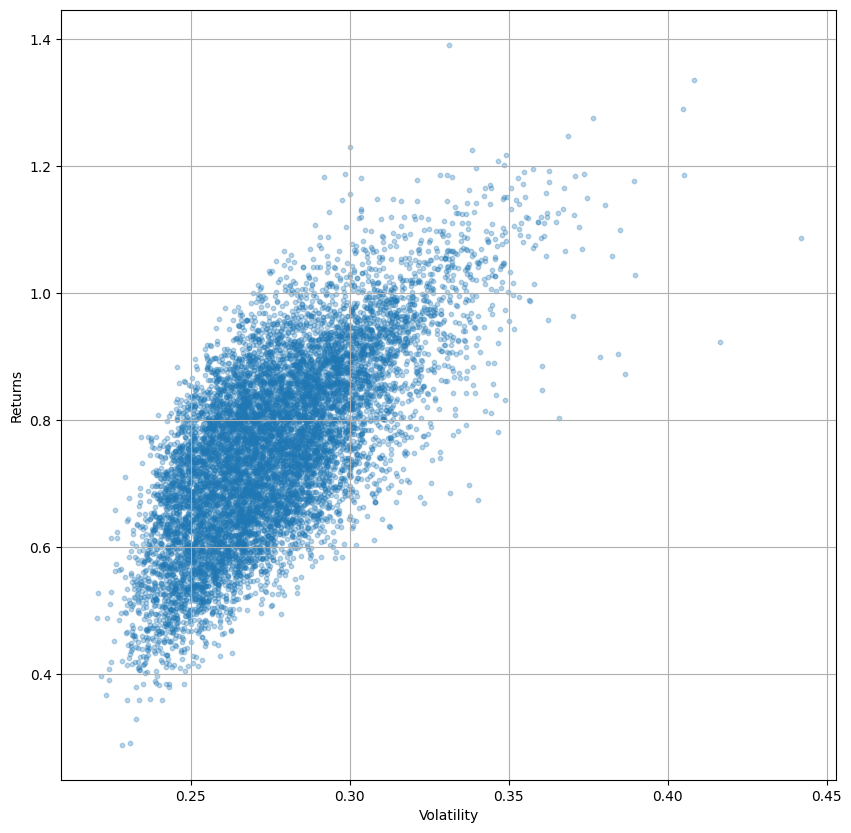

In [631]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier?
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [632]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.489618
Volatility        0.220426
BTC-USD weight    0.051578
ETH-USD weight    0.013834
TSLA weight       0.054550
NVDA weight       0.058482
AAPL weight       0.245900
MSFT weight       0.133572
ARKK weight       0.028242
AMZN weight       0.239372
ARKQ weight       0.159255
NFLX weight       0.015216
Name: 9993, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

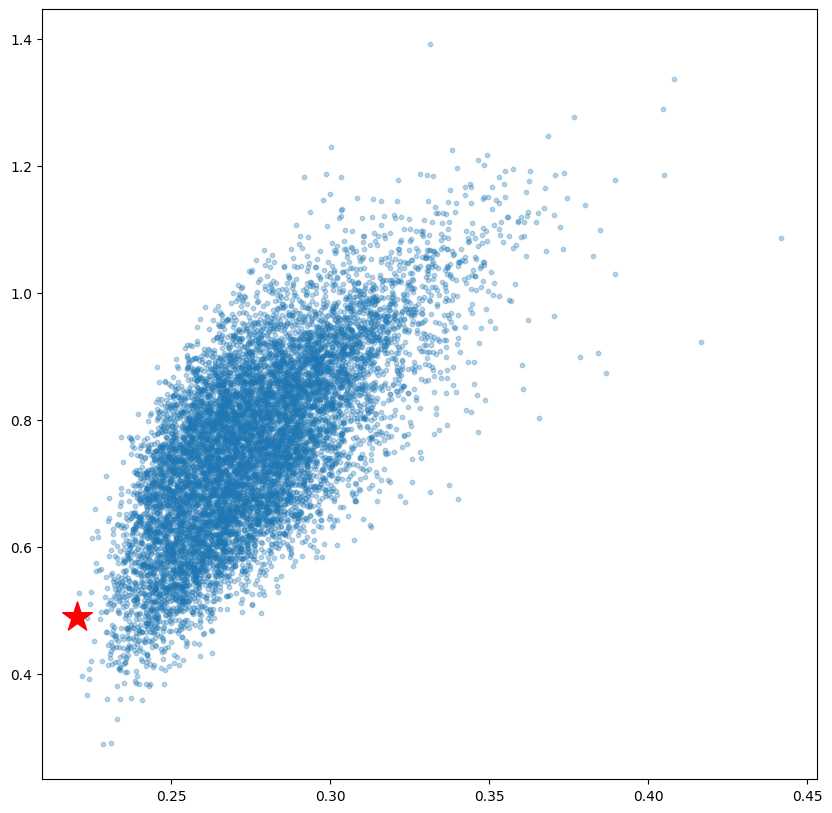

In [633]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

### The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?
This is done by using a parameter called the Sharpe Ratio.

Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

![sharpe formula](image/Sharpe-Ratio-300x149.jpg)





## Part 3: Optimal Risky Portfolio
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [634]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port.to_csv('optimal_portfolio.csv')
optimal_risky_port


Returns           1.391438
Volatility        0.331365
BTC-USD weight    0.382242
ETH-USD weight    0.028212
TSLA weight       0.157823
NVDA weight       0.111839
AAPL weight       0.075708
MSFT weight       0.002547
ARKK weight       0.054018
AMZN weight       0.013372
ARKQ weight       0.156170
NFLX weight       0.018068
Name: 1057, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

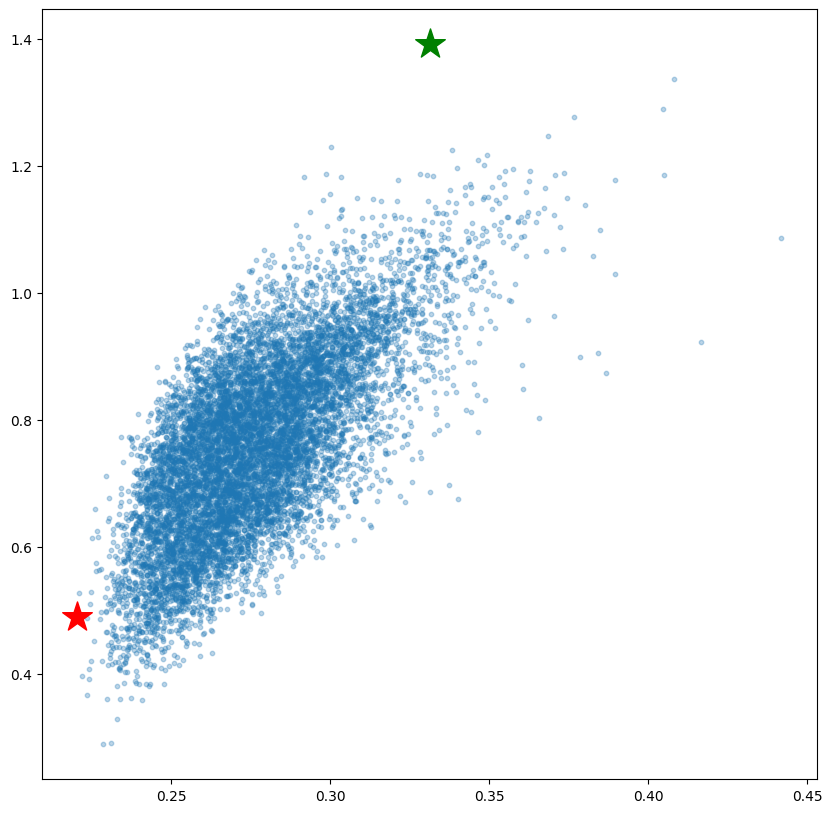

In [635]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

References
- Video series by Finquest (https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
- Investopedia (https://www.investopedia.com/terms/p/portfoliomanagement.asp)